In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

#####                              EDA BY IKRAMULLAH

## Upwork Job Exploratory Data Analysis
*  Exploratory Data Analysis (EDA) is a crucial step in understanding a dataset before diving into more complex analyses or model building. It involves summarizing main characteristics of the data, often with visual methods, to uncover patterns, spot anomalies, test a hypothesis, or check assumptions.

* Talking About Datasets
- Source: For this project, the dataset comes from Kaggle, a popular platform for data scientists and machine learning practitioners that hosts competitions and datasets.
Content: The dataset contains information about Upwork jobs. This could include various aspects such as job title, description, budget, skills required, client information (like location and feedback score), and job posting dates, among others. The exact fields available would depend on how the dataset was collected and what information was available from Upwork at the time of collection.

## Data prepration and cleaning
1- load the file using pandas

2- Look at some basic information about data and columns

3- Fix any missing and incorrect values

In [18]:
df=pd.read_csv('C:\\Complete_EDA\\Data\\upwork-jobs.csv')

# How data Look like

In [19]:
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [21]:
df.columns

Index(['title', 'link', 'description', 'published_date', 'is_hourly',
       'hourly_low', 'hourly_high', 'budget', 'country'],
      dtype='object')

In [22]:
len(df.columns)

9

## Check information like data types

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53058 entries, 0 to 53057
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           53058 non-null  object 
 1   link            53058 non-null  object 
 2   description     53058 non-null  object 
 3   published_date  53058 non-null  object 
 4   is_hourly       44829 non-null  object 
 5   hourly_low      22956 non-null  float64
 6   hourly_high     22161 non-null  float64
 7   budget          21873 non-null  float64
 8   country         51917 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.6+ MB


In [24]:
df.describe()

,hourly_low,hourly_high,budget
count,22956.000000,22161.000000,21873.000000
mean,17.467895,41.608050,746.263521
std,18.228234,47.968562,10639.241140
min,3.000000,3.000000,5.000000
25%,8.000000,20.000000,30.000000
50%,15.000000,30.000000,100.000000
75%,20.000000,50.000000,300.000000
max,500.000000,999.000000,1000000.000000


In [26]:
(df.isnull().sum()*100)/len(df)

title              0.000000
link               0.000000
description        0.000000
published_date     0.000000
is_hourly         15.509442
hourly_low        56.734140
hourly_high       58.232500
budget            58.775302
country            2.150477
dtype: float64

In [29]:
#filling missing values of hourly_low, hourly_high, budget
df['hourly_low']=df['hourly_low'].fillna(15)
df['hourly_high']=df['hourly_high'].fillna(30)
df['budget']=df['budget'].fillna(100)

In [32]:
#convert is_hourly into boolean
#A boolean value indicating if the job is hourly-based or fixed-price. (type:bool)
df['is_hourly']=df['is_hourly'].astype('bool')

In [37]:
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India


In [33]:
# fill missing values of is_hourly
df['is_hourly']=df['is_hourly'].fillna(False)

In [38]:
# filling the mmissing values in country
df['country']=df['budget'].fillna('United States')

In [56]:
df.head()

,is_hourly,hourly_low,hourly_high,budget,country
0,False,15.0,30.0,500.0,500.0
1,False,15.0,30.0,1100.0,1100.0
2,True,10.0,30.0,100.0,100.0
3,True,15.0,30.0,100.0,100.0
4,False,15.0,30.0,650.0,650.0


In [39]:
df.isnull().sum()*100/len(df)

title             0.0
link              0.0
description       0.0
published_date    0.0
is_hourly         0.0
hourly_low        0.0
hourly_high       0.0
budget            0.0
country           0.0
dtype: float64

In [40]:
#check duplicate values
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53058 entries, 0 to 53057
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           53058 non-null  object 
 1   link            53058 non-null  object 
 2   description     53058 non-null  object 
 3   published_date  53058 non-null  object 
 4   is_hourly       53058 non-null  bool   
 5   hourly_low      53058 non-null  float64
 6   hourly_high     53058 non-null  float64
 7   budget          53058 non-null  float64
 8   country         53058 non-null  float64
dtypes: bool(1), float64(4), object(4)
memory usage: 3.3+ MB


In [45]:
# print random first 5 rows
df.sample(5)

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
29220,Hi I am a 24 year old genius building a team f...,https://www.upwork.com/jobs/year-old-genius-bu...,I am looking for individuals whom have a visio...,2024-02-17 18:32:10+00:00,True,10.0,60.0,100.0,100.0
8761,Moroccan Living Room Design,https://www.upwork.com/jobs/Moroccan-Living-Ro...,A high ceiling living room with marble floors ...,2024-02-23 17:49:26+00:00,True,15.0,30.0,100.0,100.0
48294,Website Design for Office Website,https://www.upwork.com/jobs/Website-Design-for...,We are seeking a talented web designer to crea...,2024-02-20 11:19:53+00:00,True,15.0,30.0,100.0,100.0
13108,Staff Writer for Online Firearms Company,https://www.upwork.com/jobs/Staff-Writer-for-O...,"If you are looking to work from home, create y...",2024-02-18 15:16:41+00:00,True,20.0,30.0,100.0,100.0
44352,Website Redesign,https://www.upwork.com/jobs/Website-Redesign_%...,We're in need of a reliable website designer/d...,2024-02-20 19:08:57+00:00,True,15.0,30.0,100.0,100.0


In [47]:
# drop link column
df.drop('link',axis=1,inplace=True)

KeyError: "['link'] not found in axis"

In [50]:
df.drop(['title','description','published_date'],axis=1,inplace=True)

In [51]:
df.head()

,is_hourly,hourly_low,hourly_high,budget,country
0,False,15.0,30.0,500.0,500.0
1,False,15.0,30.0,1100.0,1100.0
2,True,10.0,30.0,100.0,100.0
3,True,15.0,30.0,100.0,100.0
4,False,15.0,30.0,650.0,650.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53058 entries, 0 to 53057
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   is_hourly    53058 non-null  bool   
 1   hourly_low   53058 non-null  float64
 2   hourly_high  53058 non-null  float64
 3   budget       53058 non-null  float64
 4   country      53058 non-null  float64
dtypes: bool(1), float64(4)
memory usage: 1.7 MB


In [55]:
# correlation
df.corr()['budget']

is_hourly     -0.046520
hourly_low    -0.003452
hourly_high   -0.005992
budget         1.000000
country        1.000000
Name: budget, dtype: float64

## Univariate Analysis

<Axes: xlabel='is_hourly', ylabel='count'>

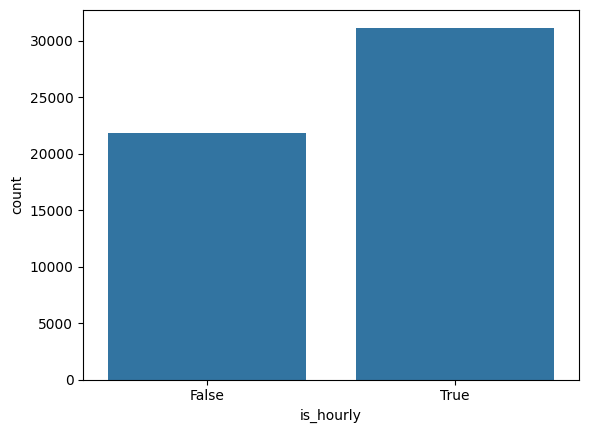

In [57]:
#univariate analysis on is_hourly
sns.countplot(x='is_hourly',data=df)

<Axes: xlabel='is_hourly', ylabel='hourly_low'>

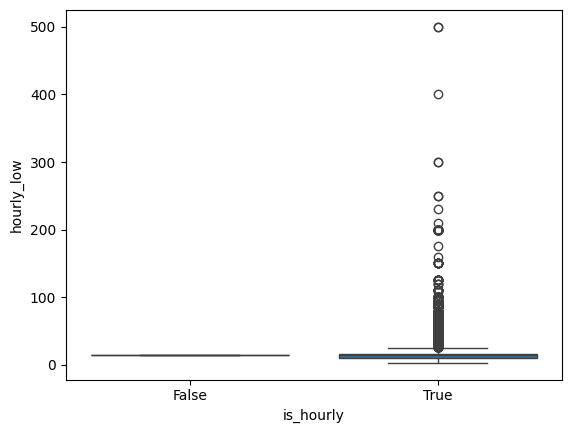

In [58]:
#univariate analysis on hourly_low
sns.boxplot(x='is_hourly',y='hourly_low',data=df)

<Axes: ylabel='Frequency'>

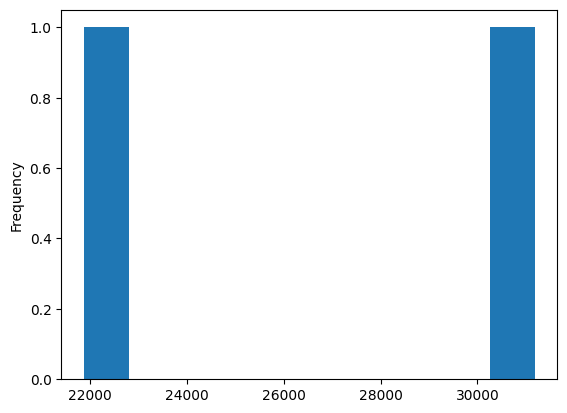

In [65]:
#univariate analysis on hourly_high
df['is_hourly'].value_counts().plot(kind='hist')

In [62]:
df.shape

(53058, 5)

In [63]:
df.head()

,is_hourly,hourly_low,hourly_high,budget,country
0,False,15.0,30.0,500.0,500.0
1,False,15.0,30.0,1100.0,1100.0
2,True,10.0,30.0,100.0,100.0
3,True,15.0,30.0,100.0,100.0
4,False,15.0,30.0,650.0,650.0


## Univariate Analysis
Univariate analysis involves examining each variable in isolation to summarize and find patterns in the data.

1. is_hourly (Boolean)
Analysis Method: Count plot or bar chart.

<Axes: xlabel='is_hourly', ylabel='count'>

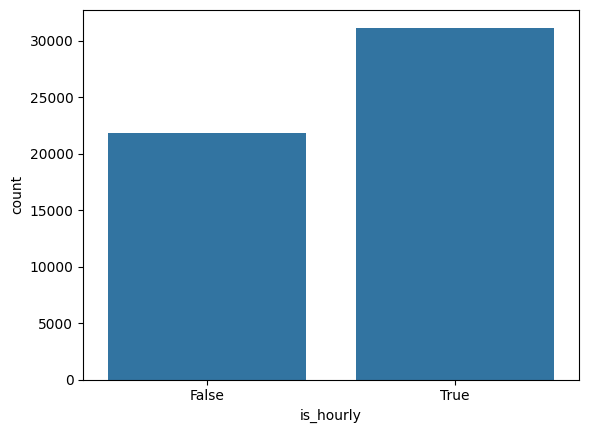

In [81]:
sns.countplot(x='is_hourly', data=df)

2. hourly_low, hourly_high, and budget (Numerical)
Analysis Method: Histograms and box plots to understand the distribution, spread, and presence of outliers.

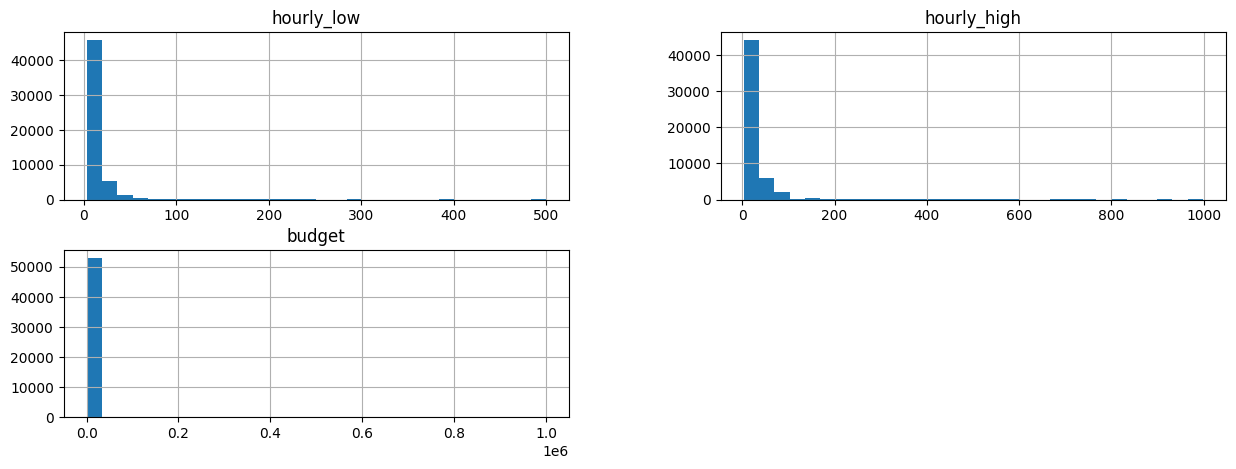

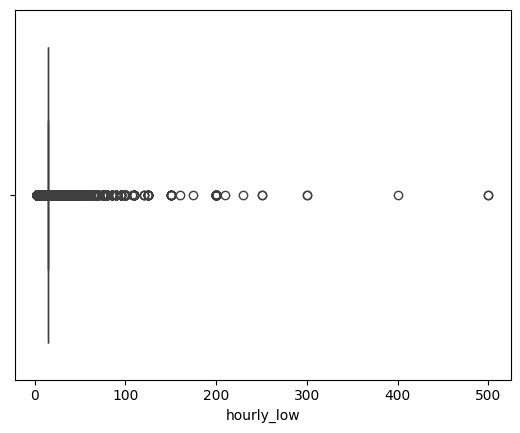

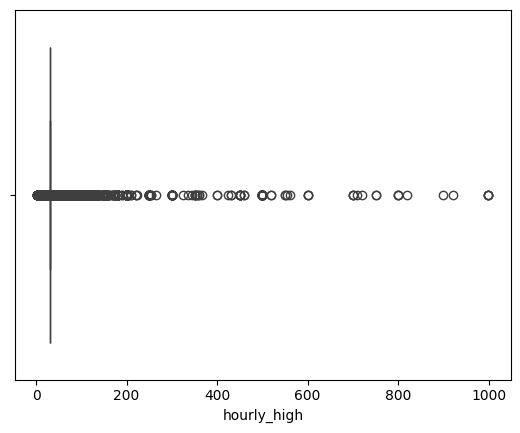

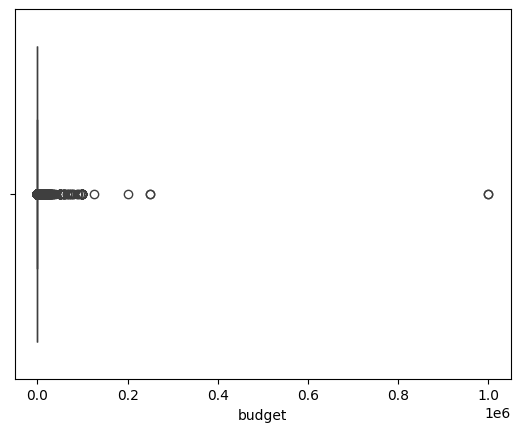

In [82]:
import matplotlib.pyplot as plt
df[['hourly_low', 'hourly_high', 'budget']].hist(bins=30, figsize=(15, 5))
plt.show()

for column in ['hourly_low', 'hourly_high', 'budget']:
    sns.boxplot(x=df[column])
    plt.show()


<Axes: xlabel='country'>

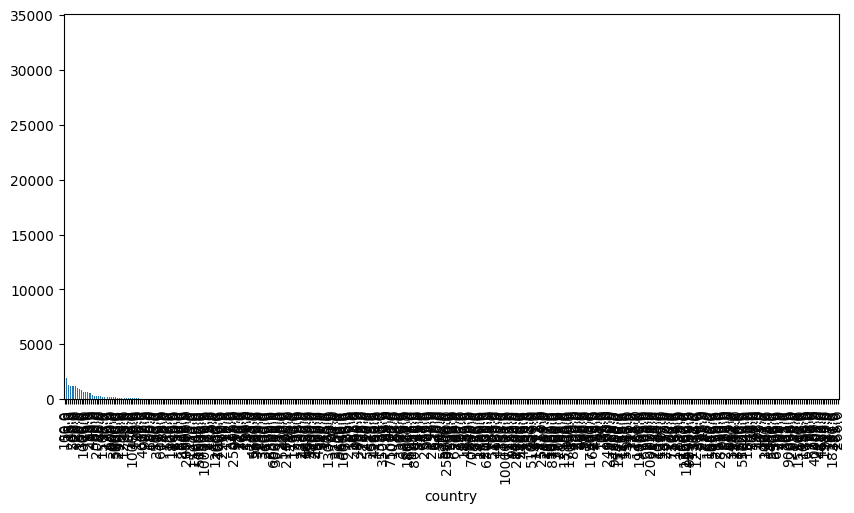

In [83]:
df['country'].value_counts().plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='country', ylabel='count'>

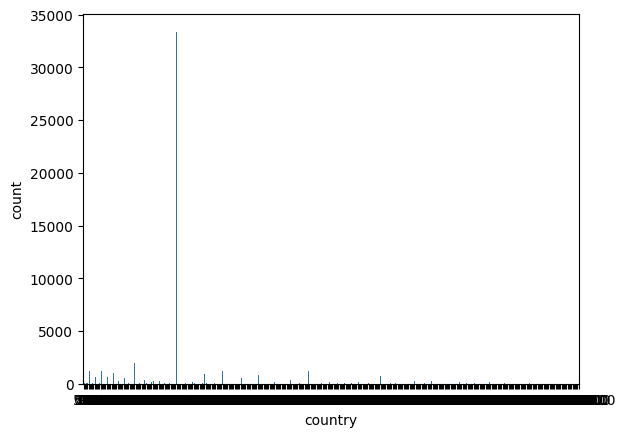

In [84]:
sns.countplot(x='country',data=df)

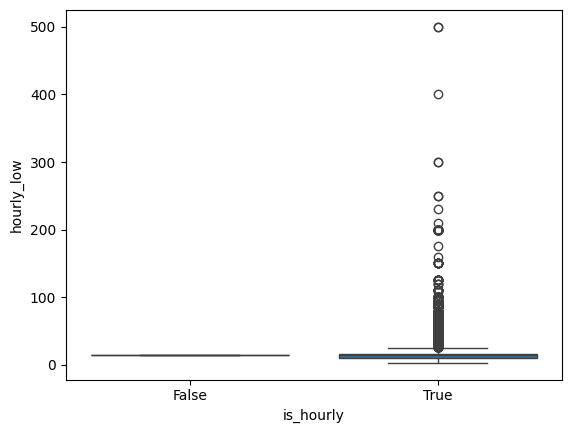

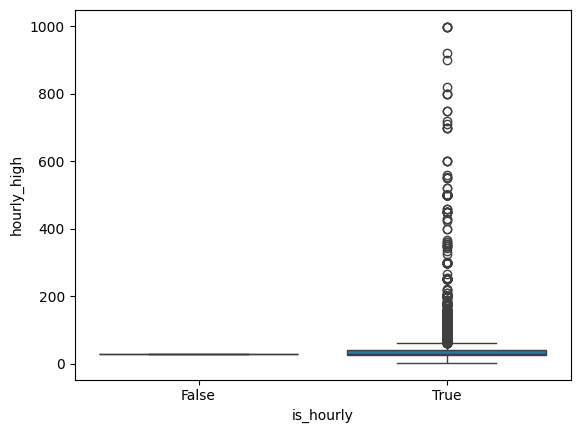

In [85]:
sns.boxplot(x='is_hourly', y='hourly_low', data=df)
plt.show()

sns.boxplot(x='is_hourly', y='hourly_high', data=df)
plt.show()

<Axes: xlabel='country', ylabel='budget'>

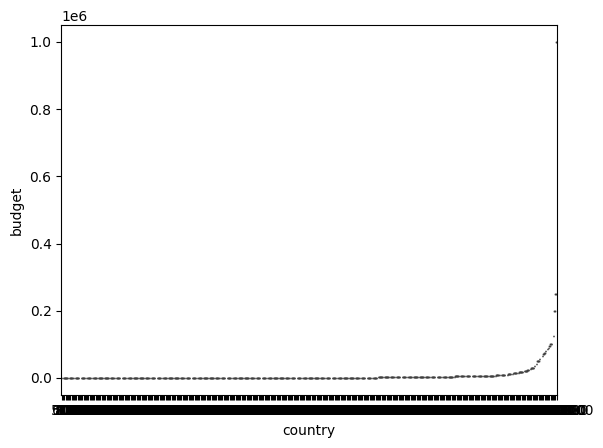

In [86]:
sns.boxplot(x='country', y='budget', data=df)

In [105]:
df.head()

,is_hourly,hourly_low,hourly_high,budget,country
0,False,15.0,30.0,500.0,500.0
1,False,15.0,30.0,1100.0,1100.0
2,True,10.0,30.0,100.0,100.0
3,True,15.0,30.0,100.0,100.0
4,False,15.0,30.0,650.0,650.0


In [107]:
import pandas as pd

# Assuming df is your DataFrame and 'column' is the name of the column you're analyzing
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['budget'] >= lower_bound) & (df['budget'] <= upper_bound)]

In [109]:
import pandas as pd

# Assuming df is your DataFrame and 'column' is the name of the column you're analyzing
Q1 = df['hourly_low'].quantile(0.25)
Q3 = df['hourly_low'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['hourly_low'] >= lower_bound) & (df['hourly_low'] <= upper_bound)]

In [110]:
import pandas as pd

# Assuming df is your DataFrame and 'column' is the name of the column you're analyzing
Q1 = df['hourly_high'].quantile(0.25)
Q3 = df['hourly_high'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['hourly_high'] >= lower_bound) & (df['hourly_high'] <= upper_bound)]

In [111]:
import pandas as pd

# Assuming df is your DataFrame and 'column' is the name of the column you're analyzing
Q1 = df['country'].quantile(0.25)
Q3 = df['country'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['country'] >= lower_bound) & (df['country'] <= upper_bound)]

In [112]:
df.head()

,is_hourly,hourly_low,hourly_high,budget,country
0,False,15.0,30.0,500.0,500.0
1,False,15.0,30.0,1100.0,1100.0
2,True,10.0,30.0,100.0,100.0
3,True,15.0,30.0,100.0,100.0
4,False,15.0,30.0,650.0,650.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53058 entries, 0 to 53057
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   is_hourly    53058 non-null  bool   
 1   hourly_low   53058 non-null  float64
 2   hourly_high  53058 non-null  float64
 3   budget       53058 non-null  float64
 4   country      53058 non-null  float64
dtypes: bool(1), float64(4)
memory usage: 1.7 MB


In [90]:
x=df.drop(['budget'],axis=1)
y=df['budget']

In [114]:

from sklearn import preprocessing
pre_processx = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [115]:
# x Represents the Features
x_transform.shape
x_transform

array([[-1.19403951, -0.08859671, -0.15379767,  0.01953399],
       [-1.19403951, -0.08859671, -0.15379767,  0.10727474],
       [ 0.83749322, -0.50347009, -0.15379767, -0.03895985],
       ...,
       [ 0.83749322,  0.5752007 ,  0.5123512 , -0.03895985],
       [-1.19403951, -0.08859671, -0.15379767, -0.04334688],
       [-1.19403951, -0.08859671, -0.15379767, -0.04480923]])

In [117]:
from sklearn.preprocessing import StandardScaler

# Assuming y is your Series
y_reshaped = y.values.reshape(-1, 1)  # Reshape to make it 2-dimensional

pre_processy = StandardScaler()
y_transformed = pre_processy.fit_transform(y_reshaped)

In [118]:
#split dataset into train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_transform,y_transformed,test_size=0.3,random_state=101)

In [119]:
#import linear regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [120]:
#predicting
y_pred=lm.predict(x_test)
print(y_pred)

[[-0.05212096]
 [-0.03895985]
 [-0.03895985]
 ...
 [-0.03895985]
 [-0.01702466]
 [-0.03895985]]


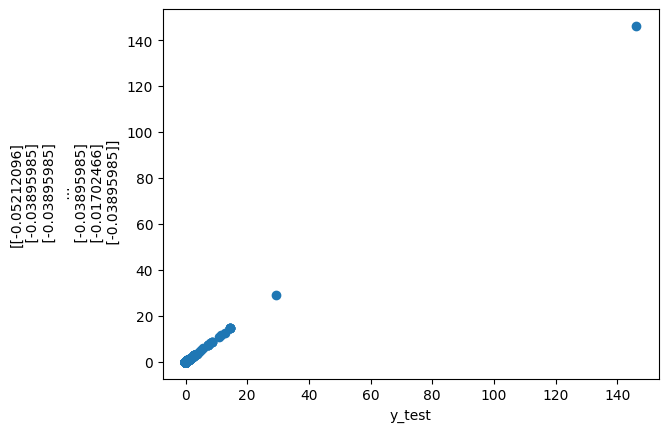

In [121]:
#draw scatterplot
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel(y_pred)
plt.show()

In [123]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         -0.05 |         -0.05
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.03 |         -0.03
         -0.01 |         -0.01
         -0.05 |         -0.05
         -0.05 |         -0.05
         -0.02 |         -0.02
         -0.04 |         -0.04
         -0.02 |         -0.02
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.05 |         -0.05
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.01 |         -0.01
         -0.04 |         -0.04
         -0.05 |         -0.05
         -0.01 |         -0.01
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.05 |         -0.05
         -0.04 |         -0.04
         -0.04 |         -0.04
         -0.04 |         -0.04
     

In [124]:
residual = actual- y_pred.reshape(-1)
print(residual)

[ 1.31611129e-02  1.99840144e-15  1.99840144e-15 ...  1.19348975e-15
 -2.19351882e-02  2.33146835e-15]


In [125]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 2.8293210447542807e-27
Root Mean Squared Error: 5.3191362501390026e-14
